¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# 1. Abre el archivo de datos y estudia la información general 

In [1]:
#Agregar todas las librerias que se necesitan para este data frame
from scipy import stats as st
from math import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Agregar el archivo
games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías y otra para leer los datos
</div>

# 2. Preparar los datos

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


En este paso, se realizarán tres modificaciones importantes en los datos. 

1. Se cambiarán los nombres de las columnas a minúsculas para facilitar su comprensión y agilizar la extracción de la información.

2. La columna 'User_Score' también está en formato float64 y refleja las calificaciones de los usuarios.


# 2.1 Paso: Corregir los datos

In [5]:
# 1: Pasar a Minúsculas el nombre de las columnas
games.columns = games.columns.str.lower() 
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#3: convertir la columna user_score a un número flotante
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
#imprimimos el nuevo archivo modificado
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar y manejar los datos
</div>

# 2.2: Revisión de ausentes 

In [7]:
print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Tratamiento de los valores ausentes:

Se ha decidido dejar los valores ausentes en las columnas 'critic_score', 'user_score' y 'rating' se rellenaran con la media, ya que rellenar con la media no debería alterar demasiado el análisis si las ventas o calificaciones no tienen valores extremadamente altos o bajos. 

Rellenar con la media también ayuda a mantener el tamaño del DataFrame, evitando la eliminación de filas.

La columna year_of_release voy a colocar el minimo en los años ausentes. Ya que son unicamente 269 valores ausentes de 16715 datos.

Razones de los valores ausentes:

a) Falta de información: No se proporcionaron puntuaciones o calificaciones en algunas fuentes.

b) Datos no recolectados: Algunos juegos o plataformas no tienen datos completos.

c) Errores de entrada: Puede haber errores en la recopilación o carga de datos.

In [8]:
promedio_critic = games['critic_score'].mean()
promedio_user = games['user_score'].mean()

In [9]:
games['critic_score'].fillna(promedio_critic, inplace=True)
games['user_score'].fillna(promedio_user, inplace=True)
print(games['critic_score'].isna().sum())
print(games['user_score'].isna().sum())

0
0


In [10]:
#Colocar 0 a las fechas que no aparecen y verificar si aún tenemos ausentes
games['year_of_release'].fillna('1980', inplace=True)
print(games['year_of_release'].isna().sum())

0


In [11]:
games['year_of_release'].describe()

count     16715.0
unique       38.0
top        2008.0
freq       1427.0
Name: year_of_release, dtype: float64

In [12]:
#Cambien de numero flotante a entero
games['year_of_release'] = games['year_of_release'].astype(int)

In [13]:
# Suma de las ventas en todas las regiones y creamos una nueva columna llamada total_sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se han calculado correctamente las métricas del paso 2
</div>

# 3. Analiza los datos

In [14]:
#Primero vamos a conocer cual es el año mínimo y máximo para empezar su análisis
year_min = games['year_of_release'].min()
year_max = games['year_of_release'].max()
print(year_min)
print(year_max)

1980
2016


In [15]:
#Conocer por año la cantidad de juegos creados
juegos_por_año = games['year_of_release'].value_counts().sort_index()
juegos_por_año = juegos_por_año.sort_values(ascending=False)
print(juegos_por_año.iloc[0:15])

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: int64


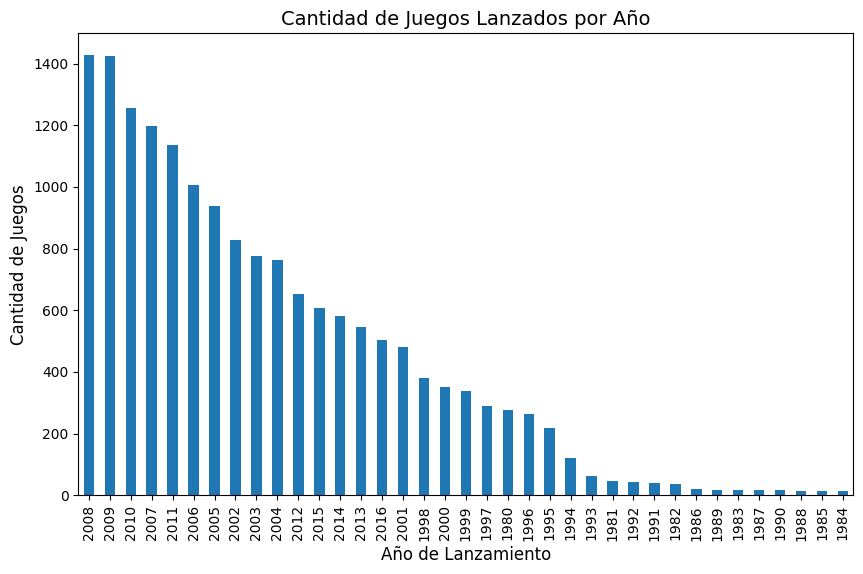

In [28]:
plt.figure(figsize=(10, 6))  # Tamaño más grande para mejor visualización
juegos_por_año.plot(kind='bar')  # Tamaño más grande para mejor visualización

# Etiquetas y título
plt.title('Cantidad de Juegos Lanzados por Año', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Cantidad de Juegos', fontsize=12)

plt.show()

Al ver los valores por año, podemos identificar qué años tuvieron más lanzamientos. Esto puede ayudar a entender tendencias, como años en los que hubo una explosión de lanzamientos debido a la aparición de nuevas consolas o franquicias populares.

Como podemos observar, los años con el mayor número de juegos lanzados fueron 2008, con 1,427 juegos, seguido de cerca por 2009, con 1,426 juegos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se muestra correctamente la distribución de ventas a lo largo de los años de lanzamiento.

Te recomiendo usar una gráfica para una mejor visualización de tu información
</div>

# Parte 3.1

In [49]:
#Filtrar las columnas que necesitamos para conocer cuales son las plataformas con mayores ventas y como se distribuyen por años
plataformas_top = games.groupby(['platform', 'year_of_release'])[['platform','total_sales']].sum()
plataformas_top = plataformas_top.sort_values(by='total_sales', ascending=False)
print(plataformas_top)

                          total_sales
platform year_of_release             
PS2      2004                  211.81
Wii      2009                  206.97
PS2      2002                  205.38
         2003                  184.31
Wii      2008                  171.32
...                               ...
PC       1988                    0.03
PCFX     1996                    0.03
3DO      1994                    0.02
DS       1985                    0.02
DC       2007                    0.02

[253 rows x 1 columns]


Como podemos observar, en 2009, la plataforma con más ventas fue Wii, seguida durante tres años consecutivos por PS2, que lideró las ventas en 2002 y 2004.

In [50]:
# Ahora conozcamos que plataformas solían ser populares pero que ahora no tienen ventas
# Paso 1: Agrupar los datos por plataforma y año de lanzamiento, y sumar las ventas totales
ventas_x_plataforma = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
 # Paso 2: Filtrar las plataformas que tienen ventas en años pasados
# Suponiendo que queremos ver plataformas que tuvieron ventas antes de 2010 pero no después
ventas_anteriores = ventas_x_plataforma.query("year_of_release < 2010") 
# Paso 3: Filtrar las plataformas que ya no tienen ventas en los últimos años (por ejemplo, 2015-2016)
ventas_recientes = ventas_x_plataforma.query("year_of_release >= 2015")
# Identificar las plataformas que solían tener ventas pero no tienen en los últimos años
plataformas_sin_ventas_recientes = ventas_anteriores[~ventas_anteriores['platform'].isin(ventas_recientes['platform'])]
# Mostrar las plataformas sin ventas reciente
print(plataformas_sin_ventas_recientes[['platform']].drop_duplicates())

    platform
0       2600
10       3DO
19        DC
26        DS
38        GB
52       GBA
61        GC
69       GEN
74        GG
75       N64
83       NES
95        NG
126     PCFX
127       PS
138      PS2
187      SAT
193      SCD
195     SNES
205     TG16
206       WS
239       XB


### Conclusiones

Plataformas que solían ser populares pero que ahora no tienen ventas recientes:

*2600
*3DO
*DC (Dreamcast)
*DS
*GB (GameBoy)
*GBA (GameBoy Advance)
*GC (GameCube)
*GEN (Genesis)

Estas plataformas, aunque tuvieron ventas en el pasado, ya no están generando ventas en los años recientes, lo que indica que han sido reemplazadas por nuevas generaciones de consolas o han quedado obsoletas en el mercado.

Aunque las plataformas de videojuegos más antiguas suelen ser reemplazadas por nuevas generaciones más rápidamente (entre 5-7 años en promedio), muchas de las plataformas más exitosas no desaparecen inmediatamente. En cambio, pueden persistir con un uso más reducido en mercados retro o nichos de coleccionistas. Esto alarga la vida de las plataformas.

A menudo, las plataformas más antiguas no desaparecen de inmediato; primero se observa una disminución gradual en las ventas, seguida de una transición hacia nuevas generaciones, como lo que sucedió con la PS2 antes de la PS3 o el paso de GameBoy a Nintendo DS. Esto podría extender la relevancia de una plataforma hasta los 20 años en algunos casos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones intermedias, este análisis está completo
</div>

# Pasos para definir el modelo de 2017

## Definir el período de tiempo relevante para el modelo de 2017

Como se menciona, necesitamos centrarnos en los datos de 2010 a 2017. Esto nos permitirá construir un modelo para 2017, basado en las plataformas relevantes y sus ventas en ese período.

Los datos anteriores a 2010 no son necesarios, ya que no reflejan las tendencias más recientes y pueden sesgar el análisis.

## Filtrar los datos relevantes

In [51]:
# Filtrar los datos entre 2010 a 2016
new_games_list = games.loc[:,['name', 'platform', 'year_of_release', 'total_sales', 'genre', 'critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales', 'rating']]
new_games_list = new_games_list.query("year_of_release >= 2010 and year_of_release <=2016")
new_games_list

,name,platform,year_of_release,total_sales,genre,critic_score,user_score,na_sales,eu_sales,jp_sales,rating
14,Kinect Adventures!,X360,2010,21.82,Misc,61.000000,6.300000,15.00,4.89,0.24,E
16,Grand Theft Auto V,PS3,2013,21.05,Action,97.000000,8.200000,7.02,9.09,0.98,M
23,Grand Theft Auto V,X360,2013,16.27,Action,97.000000,8.100000,9.66,5.14,0.06,M
27,Pokemon Black/Pokemon White,DS,2010,15.13,Role-Playing,68.967679,7.125046,5.51,3.17,5.65,NaN
29,Call of Duty: Modern Warfare 3,X360,2011,14.73,Shooter,88.000000,3.400000,9.04,4.24,0.13,M
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,0.01,Adventure,68.967679,7.125046,0.00,0.00,0.01,NaN
16707,Aiyoku no Eustia,PSV,2014,0.01,Misc,68.967679,7.125046,0.00,0.00,0.01,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,0.01,Action,68.967679,7.125046,0.00,0.00,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016,0.01,Adventure,68.967679,7.125046,0.00,0.00,0.01,NaN


In [52]:
new_games_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   int64  
 3   total_sales      5277 non-null   float64
 4   genre            5277 non-null   object 
 5   critic_score     5277 non-null   float64
 6   user_score       5277 non-null   float64
 7   na_sales         5277 non-null   float64
 8   eu_sales         5277 non-null   float64
 9   jp_sales         5277 non-null   float64
 10  rating           3113 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 494.7+ KB


## Conocer los líderes en ventas

In [53]:
# 3. Conocer los líderes en ventas 
new_ventas_games = new_games_list.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(new_ventas_games)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64


In [54]:
# Crear una lista de plataformas relevantes (sin PS2)
plataformas = ['X360', 'PS3', 'PS4', '3DS', 'Wii', 'XOne', 'DS', 'PC']

# Filtrar el DataFrame para estas plataformas
plataformas_relevantes = new_games_list[new_games_list['platform'].isin(plataformas)]

plataformas_relevantes

,name,platform,year_of_release,total_sales,genre,critic_score,user_score,na_sales,eu_sales,jp_sales,rating
14,Kinect Adventures!,X360,2010,21.82,Misc,61.000000,6.300000,15.00,4.89,0.24,E
16,Grand Theft Auto V,PS3,2013,21.05,Action,97.000000,8.200000,7.02,9.09,0.98,M
23,Grand Theft Auto V,X360,2013,16.27,Action,97.000000,8.100000,9.66,5.14,0.06,M
27,Pokemon Black/Pokemon White,DS,2010,15.13,Role-Playing,68.967679,7.125046,5.51,3.17,5.65,NaN
29,Call of Duty: Modern Warfare 3,X360,2011,14.73,Shooter,88.000000,3.400000,9.04,4.24,0.13,M
...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,0.01,Action,68.967679,7.125046,0.00,0.00,0.01,NaN
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,0.01,Action,80.000000,7.600000,0.00,0.01,0.00,M
16696,Breach,PC,2011,0.01,Shooter,61.000000,5.800000,0.01,0.00,0.00,T
16702,STORM: Frontline Nation,PC,2011,0.01,Strategy,60.000000,7.200000,0.00,0.01,0.00,E10+


In [55]:
# Agrupar por plataforma y sumar las ventas totales
ventas_totales = plataformas_relevantes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas más rentables (con más ventas)
print(ventas_totales)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
Name: total_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se obtuvieron correctamente las consolas más rentables
</div>

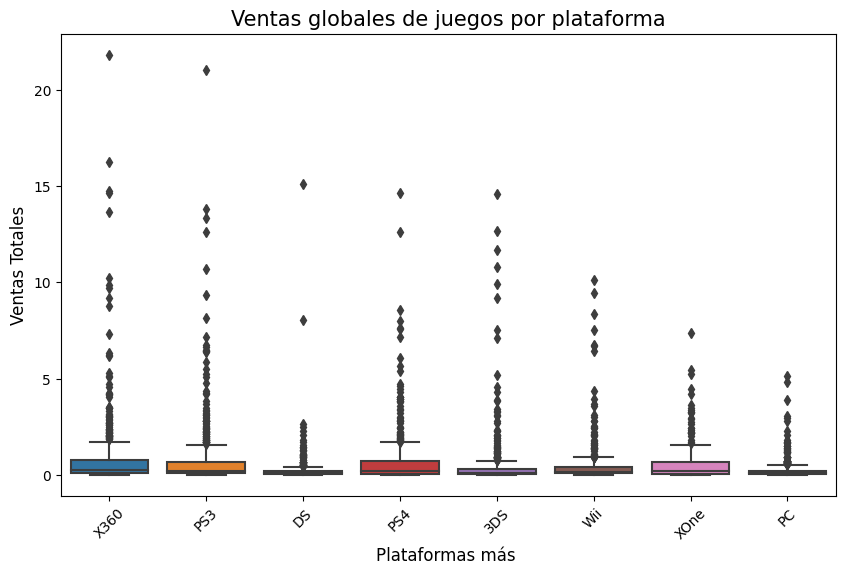

In [56]:
# Trazar un diagrama de caja para las ventas globales de todos los juegos, desglozados por plataforma
plt.figure(figsize=(10,6))
sns.boxplot(data=plataformas_relevantes, x='platform', y='total_sales')
# Etiquetas y título
plt.title('Ventas globales de juegos por plataforma', fontsize=15)
plt.xlabel('Plataformas más ', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, los boxplots están bien realizados
</div>

El diagrama de caja de las ventas globales de juegos por plataforma revela diferencias significativas en las ventas entre las plataformas analizadas:

Las plataformas X360, PS3, PS4 y XOne destacan por tener las ventas promedio más altas. Estas plataformas también muestran una mayor variabilidad en las ventas, como lo indican las cajas más altas y los puntos dispersos fuera de los bigotes. Esto sugiere que, aunque la mayoría de los juegos en estas plataformas tienen un buen desempeño, también hay algunos juegos que han tenido un rendimiento excepcional.

Los puntos dispersos fuera de las cajas indican que en plataformas como X360, PS3, PS4, y XOne existen juegos que han alcanzado ventas significativamente altas en comparación con la mayoría de los juegos en estas plataformas.

Por otro lado, DS, PC, y Wii muestran cajas más pequeñas, lo que indica una concentración de ventas en un rango más bajo y, en general, ventas más consistentes pero bajas comparadas con las plataformas líderes.

En resumen, las plataformas con más ventas como X360, PS3, PS4, y XOne tienen un desempeño destacado en comparación con otras como DS y PC, que no muestran el mismo nivel de éxito en ventas durante el período analizado.

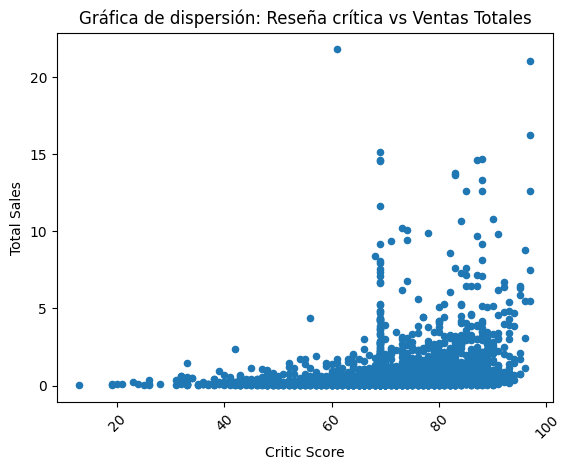

In [57]:
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas
new_games_list.plot(x='critic_score', y='total_sales', kind='scatter', rot=45)
plt.title('Gráfica de dispersión: Reseña crítica vs Ventas Totales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la correlación de las ventas con las críticas ayuda a comprender mejor la relación entre las puntuaciones y las ventas que podría llegar a tener un producto
</div>

Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [58]:
correlacion = new_games_list['critic_score'].corr(new_games_list['total_sales'])
print(correlacion)

0.28774972416772737


La correlación de 0.29 muestra que no hay una fuerte relación entre las calificaciones críticas y las ventas totales. Muchos juegos con bajas calificaciones pueden tener ventas bajas o altas. Por otro lado, algunos juegos con altas calificaciones no necesariamente tienen altas ventas, lo que indica que otros factores también pueden estar influyendo en las ventas (como la marca del juego, la campaña de marketing, la base de fans, etc.)

In [59]:
# Agrupar por género y sumar las ventas totales
ventas_por_genero = new_games_list.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

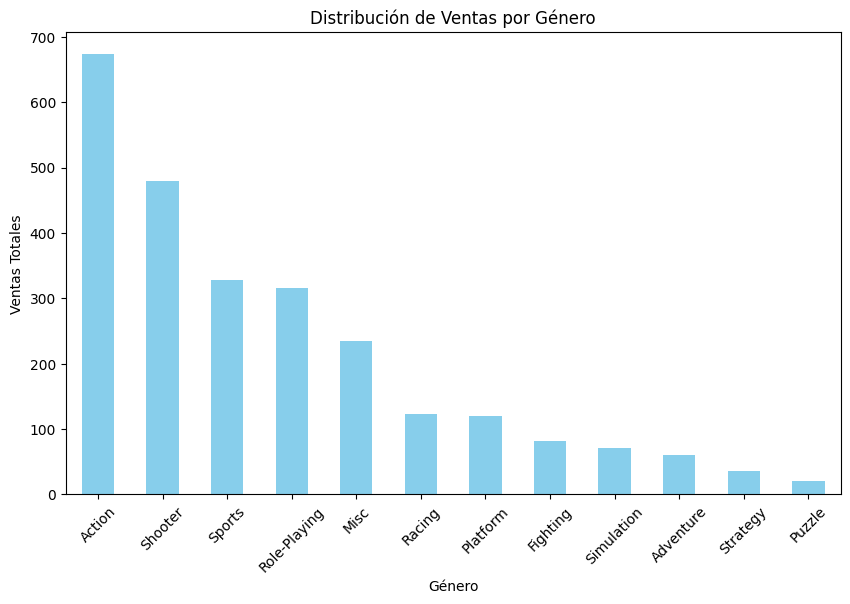

In [60]:
# Mostrar el gráfico de barras para la distribución de ventas por género
ventas_por_genero.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Títulos y etiquetas
plt.title('Distribución de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

Como podemos ver en el gráfico, Acción es el género que más se vende, con una diferencia notable respecto a los demás. Este género claramente domina las ventas, lo que probablemente se debe a la popularidad de los juegos de acción, que suelen atraer a una gran cantidad de jugadores.

Después de Acción, el siguiente género más vendido es Shooter. Aunque también tiene buenas ventas, la brecha con Acción es bastante grande. Esto indica que, aunque los juegos de disparos son muy populares, Acción sigue siendo el preferido por la mayoría.

En el medio tenemos géneros como Deportes, Role-Playing y Misc. Estos géneros tienen ventas moderadas, lo que sugiere que siguen siendo populares pero no al mismo nivel que los dos primeros.

Finalmente, los géneros como Estrategia, Aventura, Simulación, Peleas y Rompecabezas tienen ventas más bajas. Estos géneros parecen estar dirigidos a un público más específico, lo que puede explicar su menor volumen de ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, este análisis de géneros está bastante completo y bien realizado
</div>

# 4. Crea un perfil de usuario para cada región

## Ventas por región & plataformas

In [61]:
# Ventas por región & plataforma
def plataformas(df, sales):
    return df.groupby('platform')[sales].sum().sort_values(ascending=False)

na_plataformas = plataformas(new_games_list, 'na_sales')
eu_plataformas = plataformas(new_games_list, 'eu_sales')
jp_plataformas = plataformas(new_games_list, 'jp_sales')

#Imprimir las 5 plataformas con mas ventas
print(na_plataformas.iloc[0:5])
print()
print(eu_plataformas.iloc[0:5])
print()
print(jp_plataformas.iloc[0:5])

platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, excelente uso de los prints para mostrar los resultados de los análisis.
</div>

In [62]:
# Sacar la desviación estandar para ver la dispersión de los datos
std_na_plataforma = na_plataformas.std()
std_eu_plataforma = eu_plataformas.std()
std_jp_plataforma = jp_plataformas.std()

print('Desviación estandar de Norteamérica: ', std_na_plataforma)
print()
print('Desviación estandar de Europa: ', std_eu_plataforma)
print()
print('Desviación estandar de Japón: ', std_jp_plataforma)

Desviación estandar de Norteamérica:  98.42110439408566

Desviación estandar de Europa:  67.69625885437702

Desviación estandar de Japón:  29.669049325497262


# Conclusiones

El análisis de ventas por plataforma revela importantes diferencias entre las regiones. Norteamérica presenta una desviación estándar de 98.42, lo que indica gran variabilidad en las ventas entre plataformas. Las consolas X360 y PS3 siguen dominando, mientras que PS4 y XOne presentan un rendimiento inferior, lo que contribuye a la dispersión de los datos. En Europa, la desviación estándar es 67.70, lo que sugiere una distribución más homogénea en comparación con NA, aunque persiste cierta variabilidad, principalmente por las ventas de PS3 y X360. Por otro lado, Japón tiene la desviación estándar más baja con 29.67, lo que indica ventas más consistentes y una clara dominancia de 3DS, seguida de cerca por PS3, con menos variabilidad entre las plataformas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones intermedias, la desviación estandas nos sugiere mucha información sobre las preferencias de cada región.
</div>

## Ventas por región & género

In [63]:
#Ventas por región & género
def genero(df, sales): 
    return df.groupby('genre')[sales].sum().sort_values(ascending=False)

na_generos = genero(new_games_list, 'na_sales')
eu_generos = genero(new_games_list, 'eu_sales')
jp_generos = genero(new_games_list, 'jp_sales')

#Queremos imprimir los 5 géneros con mas ventas
print(na_generos.iloc[0:5])
print()
print(eu_generos.iloc[0:5])
print()
print(jp_generos.iloc[0:5])

genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64


In [64]:
#Sacar la desviación estandar
# Sacar la desviación estandar para ver la dispersión de los datos
std_na_generos = na_generos.std()
std_eu_generos = eu_generos.std()
std_jp_generos = jp_generos.std()

print('Desviación estandar de Norteamérica: ', std_na_generos)
print()
print('Desviación estandar de Europa: ', std_eu_generos)
print()
print('Desviación estandar de Japón: ', std_jp_generos)

Desviación estandar de Norteamérica:  92.8846889680797

Desviación estandar de Europa:  70.61753960060096

Desviación estandar de Japón:  30.406164396933313


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo analizando los géneros en las distintas regiones.
</div>

# Conclusiones

El análisis de las ventas por género muestra una gran variabilidad en Norteamérica, con una desviación estándar de 92.88. Los géneros como Acción y Shooter dominan las ventas, pero hay una dispersión considerable debido a otros géneros más pequeños, como RPG y Misc. En Europa, la desviación estándar de 70.62 sugiere que las ventas son algo más homogéneas, aunque sigue existiendo variabilidad, especialmente por el desempeño de Acción, Shooter y RPG, que también tiene una buena cuota de mercado. Por último, Japón, con una desviación estándar de 30.41, muestra una distribución más estable de ventas entre géneros, con RPG claramente como el género dominante.

# 5. Prueba de Hipótesis

###  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [65]:
# Filtrar las calificaciones de Xbox One y PC
xbox_one = new_games_list.query("platform == 'XOne'")['user_score']
pc = new_games_list.query("platform == 'PC'")['user_score']

alpha = 0.05
results = st.ttest_rel(xbox_one, pc)
print('valor p:', results.pvalue)
if results.pvalue == alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

ValueError: unequal length arrays

H₀: Las calificaciones promedio de Xbox One y PC son iguales.

H₁: Las calificaciones promedio de Xbox One y PC son diferentes.

Usamos la prueba t para comparar las medias y determinamos si la diferencia es estadísticamente significativa usando un valor de 0.05.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, solo hay un detalle que corregir en el código:
La prueba de hipótesis se aplica a todo un conjunto de datos no solo a la media. Para poder realizar esto se debe eliminar el .mean() al final de los filtros con el .query
</div>

###  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [ ]:
# Filtrar las calificaciones de Xbox One y PC
accion = new_games_list.query("genre == 'Action'")['user_score']
deportes = new_games_list.query("genre == 'Sports'")['user_score']

alpha = 0.05
results = st.ttest_rel(accion, deportes)
print('valor p:', results.pvalue)
if results.pvalue > alpha:
    print("Las calificaciones promedio de Acción es menor que el promedio de Deportes.")
else:
    print("Las calificaciones promedio de Acción es mayor que el promedio de Deportes.")

H₀: Las calificaciones promedio de Acción es menor que el promedio de Deportes.

H₁: Las calificaciones promedio de Acción es mayor que el promedio de Deportes.

Usamos la prueba t para comparar las medias y determinamos si la diferencia es estadísticamente significativa usando un valor de 0.05.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Mismo comentario que arriba, cambia:
```
accion = new_games_list.query("genre == 'Action'")['user_score'].mean()
deportes = new_games_list.query("genre == 'Sports'")['user_score'].mean()
```
    
por:
```
accion = new_games_list.query("genre == 'Action'")['user_score']
deportes = new_games_list.query("genre == 'Sports'")['user_score']
```    
    
De hecho te puedes dar cuenta que la hipótesis no se calculo bien porque el p valor vale nan.
 
</div>

# Conclusiones
El análisis muestra que las plataformas como X360 y PS3 siguen liderando en Norteamérica y Europa, mientras que en Japón, 3DS domina el mercado, especialmente en plataformas portátiles. Las ventas en Norteamérica tienen más variabilidad entre plataformas, con algunas consolas superando ampliamente a otras, mientras que en Japón las ventas son más estables.

En cuanto a los géneros, Acción es el más popular en Norteamérica y Europa, y RPG destaca en Japón, reflejando las preferencias regionales. Los géneros como Shooter y Deportes también tienen un buen desempeño en NA y UE, pero hay diferencias claras entre las regiones.

Finalmente, la prueba de hipótesis para comparar las calificaciones de Xbox One y PC no mostró evidencia suficiente para afirmar que sean significativamente diferentes.

En resumen, Acción y Shooter son los géneros más fuertes en NA y UE, mientras que RPG es el favorito en Japón. Las ventas varían más en NA, pero Japón muestra una tendencia más estable y consistente.